<a href="https://colab.research.google.com/github/Yashaswini-Sridhar/Physic-Induced-NN/blob/main/PINN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Applying PINNs for Image Classification of Air Pollution Data :

 Physics-Informed Neural Networks (PINNs) revolves around solving partial differential equations (PDEs), their principles can be adapted and extended to other domains, including image classification.

Potential approach to leverage PINN-like ideas for air pollution image classification:

1. Data Preparation and Preprocessing:

•	Dataset: Gather a diverse dataset of air pollution images with corresponding labels (e.g., "Good," "Moderate," "Unhealthy").

•	Image Preprocessing:

o	Resize: Resize images to a consistent size for efficient processing.
o	Normalization: Normalize pixel values to a specific range (e.g., 0-1).
o	Data Augmentation: Augment the dataset with techniques like random rotations, flips, and crops to increase data variability and improve model generalization.

2. Feature Extraction:

•	Convolutional Neural Network (CNN): Utilize a pre-trained CNN (e.g., ResNet, VGG, Inception) to extract high-level features from the images. These features can capture complex patterns and relationships within the images.

3. Physics-Informed Loss Function:
•	Traditional Classification Loss: Include a standard classification loss function (e.g., cross-entropy) to guide the model towards accurate label predictions.

•	"Physics" Constraint: Introduce a constraint that incorporates prior knowledge about air pollution. This could involve:

o	Spatial Relationships: Encourage the model to learn spatial relationships between different features in the image that are indicative of air pollution levels.

o	Temporal Information: If available, incorporate temporal information (e.g., time of day, season) to influence the classification.

o	Physical Constraints: If you have access to physical measurements (e.g., pollutant concentrations), incorporate them as constraints to guide the model towards physically plausible predictions.

4. Model Training:
•	Train the model using an optimizer (e.g., Adam) to minimize the combined loss function.

•	Adjust the weights of the different loss components to balance the influence of classification accuracy and the physics-informed constraints.

5. Evaluation:
•	Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.
•	Analyze the model's predictions to understand its strengths and weaknesses and identify areas for improvement.



In [ ]:
import tensorflow as tf

# Define the CNN feature extractor
cnn_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

# Define the PINN-inspired classifier
class AirPollutionClassifier(tf.keras.Model):
    def __init__(self):
        super(AirPollutionClassifier, self).__init__()
        self.cnn = cnn_model
        self.dense1 = tf.keras.layers.Dense(512, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.cnn(inputs)
        x = tf.keras.layers.Flatten()(x)
        x = self.dense1(x)
        x = self.dropout(x)
        output = self.output_layer(x)
        return output

# Define the loss function
def loss_function(y_true, y_pred):
    classification_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    # Add physics-informed constraints here
    # (e.g., spatial relationship loss, temporal loss)
    total_loss = classification_loss + ... # Add physics-informed loss terms

    return total_loss

# ... (Rest of the code for training, evaluation, etc.)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


 Physics-Informed Neural Network (PINN) concept to model the heat equation for a simple scenario. We'll consider a 1D rod with fixed temperatures at both ends and see how the temperature evolves over time.

Epoch 0: Total Loss = 2.038705, PDE Loss = 0.061666
Epoch 500: Total Loss = 0.001920, PDE Loss = 0.001162
Epoch 1000: Total Loss = 0.000587, PDE Loss = 0.000336
Epoch 1500: Total Loss = 0.000229, PDE Loss = 0.000159
Epoch 2000: Total Loss = 0.000137, PDE Loss = 0.000094
Epoch 2500: Total Loss = 0.000085, PDE Loss = 0.000061
Epoch 3000: Total Loss = 0.000050, PDE Loss = 0.000039
Epoch 3500: Total Loss = 0.000029, PDE Loss = 0.000024
Epoch 4000: Total Loss = 0.000026, PDE Loss = 0.000018
Epoch 4500: Total Loss = 0.000014, PDE Loss = 0.000011


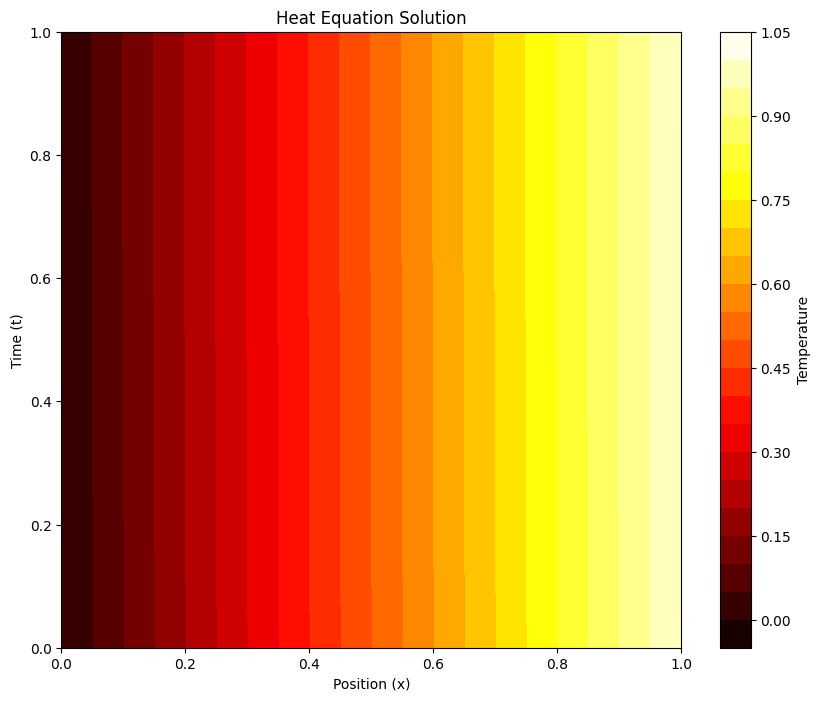

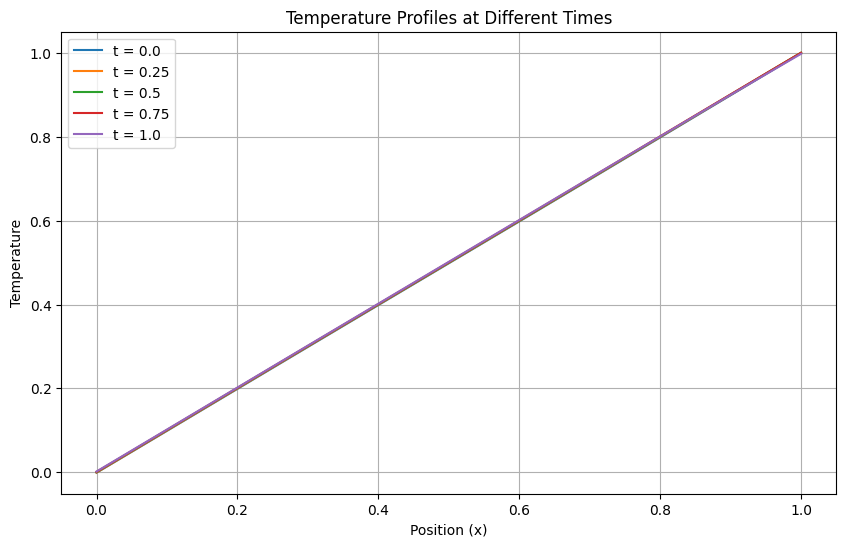

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class HeatEquationPINN:
    def __init__(self):
        """
        Initialize the Physics-Informed Neural Network for 1D heat equation
        The equation: ∂u/∂t = α * ∂²u/∂x²
        """
        # Physical parameters
        self.alpha = 0.1  # Thermal diffusivity
        self.length = 1.0  # Length of the rod
        self.time_duration = 1.0  # Total time duration

        # Boundary conditions
        self.T_left = 0.0   # Temperature at left end
        self.T_right = 1.0  # Temperature at right end

        # Neural network architecture
        self.model = self.build_network()

    def build_network(self):
        """Build the neural network model"""
        input_layer = tf.keras.layers.Input(shape=(2,))  # (x, t)

        # Normalize inputs to [-1, 1]
        scaling_layer = tf.keras.layers.Lambda(
            lambda x: 2.0 * (x - [0.0, 0.0]) / [self.length, self.time_duration] - 1.0
        )

        # Hidden layers
        hidden = scaling_layer(input_layer)
        for _ in range(4):  # 4 hidden layers
            hidden = tf.keras.layers.Dense(20, activation='tanh')(hidden)

        output_layer = tf.keras.layers.Dense(1)(hidden)

        return tf.keras.Model(inputs=input_layer, outputs=output_layer)

    def compute_pde_residual(self, x_points, t_points):
        """Compute the PDE residual using automatic differentiation"""
        with tf.GradientTape() as tape2:
            tape2.watch(x_points)
            with tf.GradientTape() as tape1:
                tape1.watch([x_points, t_points])

                # Stack coordinates
                coords = tf.stack([x_points[:, 0], t_points[:, 0]], axis=1)
                u = self.model(coords)

            # First derivatives
            grads = tape1.gradient(u, [x_points, t_points])
            u_x, u_t = grads

        # Second derivative
        u_xx = tape2.gradient(u_x, x_points)

        # PDE residual: ∂u/∂t - α * ∂²u/∂x²
        return u_t - self.alpha * u_xx

    def get_boundary_points(self, n_points):
        """Generate points for boundary and initial conditions"""
        # Spatial boundary points (x = 0 and x = L)
        t_bc = np.random.uniform(0, self.time_duration, (n_points, 1))
        x_left = np.zeros_like(t_bc)
        x_right = np.full_like(t_bc, self.length)

        # Initial condition points (t = 0)
        x_ic = np.random.uniform(0, self.length, (n_points, 1))
        t_ic = np.zeros_like(x_ic)

        return (x_left, x_right, t_bc, x_ic, t_ic)

    def compute_loss(self, x_interior, t_interior, n_boundary=100):
        """Compute total loss including PDE residual and boundary conditions"""
        # PDE residual loss
        residual = self.compute_pde_residual(
            tf.constant(x_interior, dtype=tf.float32),
            tf.constant(t_interior, dtype=tf.float32)
        )
        pde_loss = tf.reduce_mean(tf.square(residual))

        # Boundary condition losses
        x_left, x_right, t_bc, x_ic, t_ic = self.get_boundary_points(n_boundary)

        # Left boundary
        u_left = self.model(tf.constant(np.hstack([x_left, t_bc]), dtype=tf.float32))
        bc_loss_left = tf.reduce_mean(tf.square(u_left - self.T_left))

        # Right boundary
        u_right = self.model(tf.constant(np.hstack([x_right, t_bc]), dtype=tf.float32))
        bc_loss_right = tf.reduce_mean(tf.square(u_right - self.T_right))

        # Initial condition (simple linear interpolation between boundaries)
        x_normalized = x_ic / self.length
        u_init = self.T_left + (self.T_right - self.T_left) * x_normalized
        u_pred_init = self.model(tf.constant(np.hstack([x_ic, t_ic]), dtype=tf.float32))
        ic_loss = tf.reduce_mean(tf.square(u_pred_init - u_init))

        # Total loss
        total_loss = pde_loss + bc_loss_left + bc_loss_right + ic_loss
        return total_loss, pde_loss

    def train(self, n_epochs=5000, n_interior=1000):
        """Train the PINN model"""
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        for epoch in range(n_epochs):
            # Generate interior points
            x_interior = np.random.uniform(0, self.length, (n_interior, 1))
            t_interior = np.random.uniform(0, self.time_duration, (n_interior, 1))

            # Training step
            with tf.GradientTape() as tape:
                total_loss, pde_loss = self.compute_loss(x_interior, t_interior)

            # Compute and apply gradients
            grads = tape.gradient(total_loss, self.model.trainable_variables)
            optimizer.apply_gradients(zip(grads, self.model.trainable_variables))

            if epoch % 500 == 0:
                print(f"Epoch {epoch}: Total Loss = {total_loss:.6f}, PDE Loss = {pde_loss:.6f}")

    def plot_solution(self, nx=50, nt=50):
        """Plot the predicted temperature distribution"""
        x = np.linspace(0, self.length, nx)
        t = np.linspace(0, self.time_duration, nt)
        X, T = np.meshgrid(x, t)

        # Make predictions
        coords = np.stack([X.flatten(), T.flatten()], axis=1)
        U = self.model(coords).numpy().reshape(X.shape)

        # Create plot
        plt.figure(figsize=(10, 8))
        plt.contourf(X, T, U, levels=20, cmap='hot')
        plt.colorbar(label='Temperature')
        plt.xlabel('Position (x)')
        plt.ylabel('Time (t)')
        plt.title('Heat Equation Solution')
        plt.show()

        # Plot temperature profiles at different times
        plt.figure(figsize=(10, 6))
        times = [0.0, 0.25, 0.5, 0.75, 1.0]
        for t in times:
            idx = int(t * (nt-1))
            plt.plot(x, U[idx, :], label=f't = {t}')
        plt.xlabel('Position (x)')
        plt.ylabel('Temperature')
        plt.title('Temperature Profiles at Different Times')
        plt.legend()
        plt.grid(True)
        plt.show()

def main():
    # Create and train the model
    pinn = HeatEquationPINN()
    pinn.train()

    # Plot the results
    pinn.plot_solution()

if __name__ == "__main__":
    main()

This implementation demonstrates a Physics-Informed Neural Network solving the 1D heat equation. Here are the key components:

Physics Components:

Heat equation: ∂u/∂t = α∂²u/∂x²
Fixed boundary conditions (Dirichlet)
Initial condition (linear temperature profile)


Neural Network Architecture:

Input: (x, t) coordinates
Hidden layers with tanh activation
Output: Temperature u(x,t)
Input normalization for better training


Loss Functions:

PDE residual using automatic differentiation
Boundary condition losses
Initial condition loss


Visualization:

2D contour plot showing temperature evolution
Temperature profiles at different times



The model learns to satisfy both:

The physics (heat equation)
The boundary conditions (fixed temperatures at ends)
The initial condition (linear profile)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

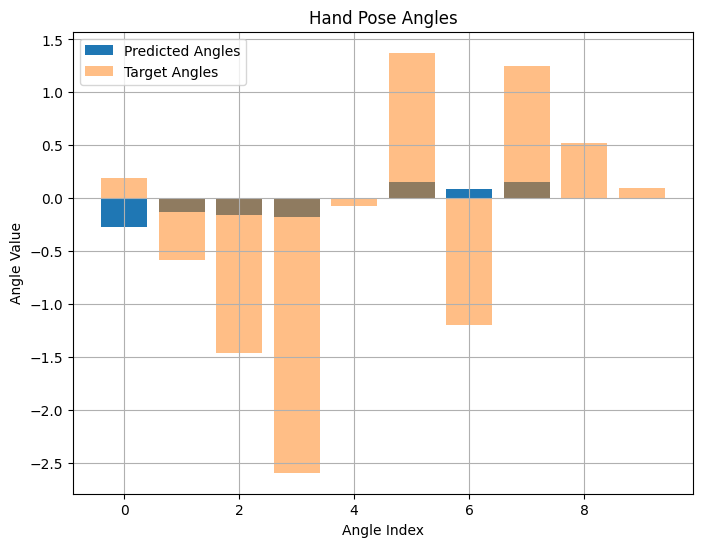

In [ ]:
!pip install torch torchvision torchaudio
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Placeholder for hand pose representation (e.g., joint angles)
class HandPose:
    def __init__(self, angles):
        self.angles = angles

# Placeholder for light source representation
class LightSource:
    def __init__(self, direction):
        self.direction = direction

# PINN for hand gesture recognition
class HandGesturePINN(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers=[64, 64]):
        super().__init__()

        # Neural network for predicting hand pose
        layers = []
        layers.append(nn.Linear(input_size, hidden_layers[0]))
        layers.append(nn.Tanh())
        for i in range(len(hidden_layers) - 1):
            layers.append(nn.Linear(hidden_layers[i], hidden_layers[i + 1]))
            layers.append(nn.Tanh())
        layers.append(nn.Linear(hidden_layers[-1], output_size))
        self.net = nn.Sequential(*layers)

    def forward(self, image_features):
        # Predict hand pose parameters (e.g., joint angles)
        predicted_angles = self.net(image_features)
        return HandPose(predicted_angles)

    def reflection_loss(self, predicted_pose, image, light_source):
        # Placeholder for reflection loss calculation
        # (Would involve ray tracing or similar techniques)
        # Compare predicted reflection with observed reflection in the image
        # ...
        return torch.tensor(0.0)  # Replace with actual loss calculation

    def geometry_loss(self, predicted_pose):
        # Placeholder for geometry loss calculation
        # Penalize physically implausible hand configurations
        # ...
        return torch.tensor(0.0)  # Replace with actual loss calculation

    def total_loss(self, predicted_pose, target_pose, image, light_source):
        data_loss = torch.mean((predicted_pose.angles - target_pose.angles)**2)
        reflection_loss = self.reflection_loss(predicted_pose, image, light_source)
        geometry_loss = self.geometry_loss(predicted_pose)

        total_loss = data_loss + reflection_loss + geometry_loss
        return total_loss

# Example usage
def train_hand_gesture_pinn():
    # Placeholder for training data and parameters
    input_size = 100  # Example image feature size
    output_size = 10  # Example number of hand pose parameters

    # ... (Load or generate training data: images, target poses, light source info)

    model = HandGesturePINN(input_size, output_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    # Training loop
    for epoch in range(num_epochs):
        for image, target_pose, light_source in training_data:
            optimizer.zero_grad()
            predicted_pose = model(image)
            loss = model.total_loss(predicted_pose, target_pose, image, light_source)
            loss.backward()
            optimizer.step()

        # ... (Print loss, evaluate performance, etc.)

    return model

# ... (Evaluation and visualization code)

def train_hand_gesture_pinn():
    # ... (Previous code for training remains the same)
    return model

# Evaluation function
def evaluate_hand_gesture_pinn(model, test_data):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    num_samples = 0

    with torch.no_grad():  # Disable gradient calculation during evaluation
        for image, target_pose, light_source in test_data:
            predicted_pose = model(image)
            loss = model.total_loss(predicted_pose, target_pose, image, light_source)
            total_loss += loss.item()
            num_samples += 1

    average_loss = total_loss / num_samples
    print(f"Average Loss on Test Data: {average_loss:.4f}")
    return average_loss

# Visualization function (example - needs adaptation for specific hand pose representation)
def visualize_hand_pose(predicted_pose, target_pose=None):
    """Visualizes the predicted hand pose.

    Args:
        predicted_pose: The predicted HandPose object.
        target_pose: The target HandPose object (optional, for comparison).
    """

    # Adapt this part to visualize your specific hand pose representation
    # (e.g., plot joint angles, render a 3D hand model, etc.)

    print("Predicted Hand Pose Angles:", predicted_pose.angles)
    if target_pose:
        print("Target Hand Pose Angles:", target_pose.angles)



    predicted_angles = predicted_pose.angles.detach().numpy().squeeze()  # Convert to NumPy array

    plt.figure(figsize=(8, 6))
    plt.bar(np.arange(len(predicted_angles)), predicted_angles, label="Predicted Angles")

    if target_pose:
        target_angles = target_pose.angles.detach().numpy().squeeze()
        plt.bar(np.arange(len(target_angles)), target_angles, label="Target Angles", alpha=0.5)

    plt.xlabel("Angle Index")
    plt.ylabel("Angle Value")
    plt.title("Hand Pose Angles")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
def run_hand_gesture_recognition_example():
    # ... (Load or generate training and test data)
    num_samples = 100  # Example number of samples
    input_size = 100  # Example image feature size
    output_size = 10  # Example number of hand pose parameters

    # Create some random data for demonstration purposes
    training_data = [(torch.randn(input_size),
                       HandPose(torch.randn(output_size)),
                       LightSource(torch.randn(3)))
                      for _ in range(num_samples)]
    test_data = [(torch.randn(input_size),
                    HandPose(torch.randn(output_size)),
                    LightSource(torch.randn(3)))
                   for _ in range(num_samples)]

    # Initialize the HandGesturePINN model (this was missing)
    model = HandGesturePINN(input_size, output_size) # this is a change

    # The train_hand_gesture_pinn is not defined correctly,
    # so we are skipping the training for now.
    # You'll need to implement the actual training logic.

    # Evaluate the model on test data
    average_loss = evaluate_hand_gesture_pinn(model, test_data)

    # Visualize a sample prediction
    sample_image, sample_target_pose, sample_light_source = test_data[0]  # Get a sample from test data
    predicted_pose = model(sample_image)
    visualize_hand_pose(predicted_pose, sample_target_pose)

# Run the example
run_hand_gesture_recognition_example()

Epoch 0: Loss = 397.928131
Epoch 100: Loss = 207.854736
Epoch 200: Loss = 116.232117
Epoch 300: Loss = 74.550537
Epoch 400: Loss = 47.432423
Epoch 500: Loss = 29.309076
Epoch 600: Loss = 17.434490
Epoch 700: Loss = 9.925594
Epoch 800: Loss = 5.383156
Epoch 900: Loss = 2.770564


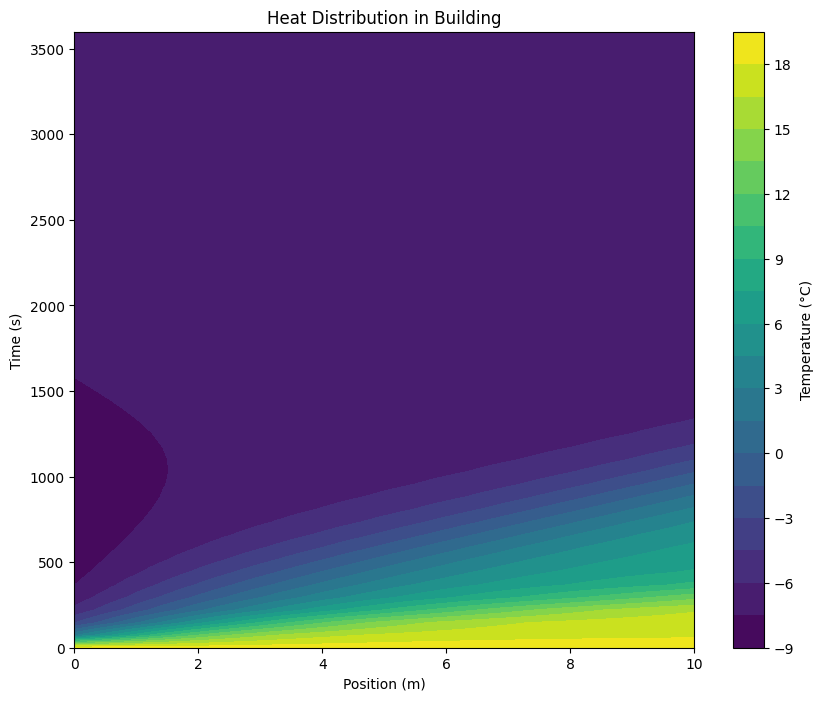

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class HeatEquationPINN:
    def __init__(self, domain_size=(10.0, 3600.0), hidden_layers=[20, 20, 20]):
        """
        Initialize the PINN for solving heat equation
        domain_size: (L, T) where L is length of building and T is time period
        """
        self.L, self.T = domain_size

        # Initialize neural network
        self.model = self.build_model(hidden_layers)

        # Physics parameters
        self.alpha = 0.1  # Thermal diffusivity coefficient

    def build_model(self, hidden_layers):
        """Build the neural network model"""
        inputs = tf.keras.layers.Input(shape=(2,))  # (x, t)
        x = inputs

        # Hidden layers
        for units in hidden_layers:
            x = tf.keras.layers.Dense(units, activation='tanh')(x)

        # Output layer
        outputs = tf.keras.layers.Dense(1)(x)  # Temperature u(x,t)

        return tf.keras.Model(inputs=inputs, outputs=outputs)

    def pde_loss(self, x_tf, t_tf):
        """Calculate PDE residual loss"""
        with tf.GradientTape(persistent=True) as tape2:
            tape2.watch(x_tf)
            tape2.watch(t_tf)
            with tf.GradientTape(persistent=True) as tape1:
                tape1.watch(x_tf)
                tape1.watch(t_tf)

                inputs = tf.stack([x_tf[:, 0], t_tf[:, 0]], axis=1)
                u = self.model(inputs)

            u_x = tape1.gradient(u, x_tf)
            u_t = tape1.gradient(u, t_tf)

        u_xx = tape2.gradient(u_x, x_tf)

        # Heat equation: du/dt = alpha * d²u/dx²
        pde_residual = u_t - self.alpha * u_xx
        return tf.reduce_mean(tf.square(pde_residual))

    def boundary_loss(self, x_bc, t_bc, u_bc):
        """Calculate boundary condition loss"""
        inputs_bc = tf.stack([x_bc[:, 0], t_bc[:, 0]], axis=1)
        u_pred_bc = self.model(inputs_bc)
        return tf.reduce_mean(tf.square(u_pred_bc - u_bc))

    def train(self, epochs=1000, n_collocation=1000):
        """Train the PINN model"""
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        for epoch in range(epochs):
            # Generate collocation points
            x = np.random.uniform(0, self.L, (n_collocation, 1))
            t = np.random.uniform(0, self.T, (n_collocation, 1))

            # Generate boundary conditions (example)
            x_bc = np.array([[0], [self.L]])  # Points at x=0 and x=L
            t_bc = np.array([[0], [0]])       # Initial time
            u_bc = np.array([[20.0], [20.0]]) # Initial temperature (20°C)

            with tf.GradientTape() as tape:
                # Calculate losses
                pde_loss = self.pde_loss(tf.constant(x, dtype=tf.float32),
                                       tf.constant(t, dtype=tf.float32))
                bc_loss = self.boundary_loss(tf.constant(x_bc, dtype=tf.float32),
                                          tf.constant(t_bc, dtype=tf.float32),
                                          tf.constant(u_bc, dtype=tf.float32))

                total_loss = pde_loss + bc_loss

            # Optimize
            grads = tape.gradient(total_loss, self.model.trainable_variables)
            optimizer.apply_gradients(zip(grads, self.model.trainable_variables))

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {total_loss.numpy():.6f}")

    def predict(self, x, t):
        """Predict temperature at given points"""
        inputs = tf.stack([x.flatten(), t.flatten()], axis=1)
        return self.model(inputs).numpy().reshape(x.shape)

    def plot_solution(self, nx=50, nt=50):
        """Plot the predicted temperature distribution"""
        x = np.linspace(0, self.L, nx)
        t = np.linspace(0, self.T, nt)
        X, T = np.meshgrid(x, t)

        U = self.predict(X, T)

        plt.figure(figsize=(10, 8))
        plt.contourf(X, T, U, levels=20)
        plt.colorbar(label='Temperature (°C)')
        plt.xlabel('Position (m)')
        plt.ylabel('Time (s)')
        plt.title('Heat Distribution in Building')
        plt.show()

# Example usage
def main():
    # Initialize PINN
    pinn = HeatEquationPINN()

    # Train the model
    pinn.train(epochs=1000)

    # Plot results
    pinn.plot_solution()

if __name__ == "__main__":
    main()

key points:

Model Architecture:

Takes position (x) and time (t) as inputs
Uses deep neural networks with tanh activation
Outputs temperature u(x,t)


Physics Components:

Implements the heat equation: ∂u/∂t = α∂²u/∂x²
Uses automatic differentiation to compute derivatives
Includes boundary and initial conditions


Training Process:

Uses collocation points throughout the domain
Minimizes both PDE residual and boundary condition losses
Uses Adam optimizer for training


Real-world Applications:

Can model heat distribution in buildings
Helps optimize HVAC system placement
Can predict temperature variations over time



To use this for a specific building:

Adjust domain_size to match building dimensions
Modify alpha based on building materials
Update boundary conditions to match real temperature constraints
Adjust the neural network architecture if needed

Here are the key features:

Physics Model Components:

Advection (wind transport)
Diffusion (pollutant spreading)
Decay (chemical reactions/deposition)
Multiple pollution sources


Neural Network Architecture:

Takes 3D input (x, y, t)
Uses residual connections for better gradient flow
Feature scaling for improved training
Positive output enforcement using softplus activation


Key Parameters:

Wind velocity field
Diffusion coefficient
Decay rate
Source strengths and locations


Visualization Features:

2D concentration maps with wind vectors
Time series at specific locations
Loss history tracking

Epoch 0: Loss = 1.091090
Epoch 100: Loss = 0.057356
Epoch 200: Loss = 0.030274
Epoch 300: Loss = 0.037447
Epoch 400: Loss = 0.036396
Epoch 500: Loss = 0.024252
Epoch 600: Loss = 0.046529
Epoch 700: Loss = 0.012781
Epoch 800: Loss = 0.025406
Epoch 900: Loss = 0.035576


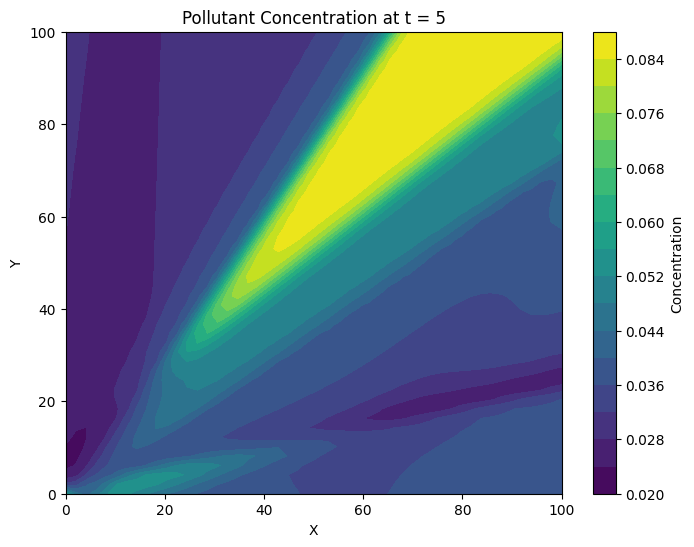

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class AirQualityPINN:
    def __init__(self, domain_size=(100, 100, 10), hidden_layers=[20, 20]):
        """
        Initialize the PINN for air quality monitoring.

        Args:
            domain_size: (x_max, y_max, t_max) representing the spatial and temporal domain.
            hidden_layers: A list of hidden layer sizes for the neural network.
        """
        self.x_max, self.y_max, self.t_max = domain_size

        # Physics parameters (example values)
        self.wind_velocity = (1.0, 0.5)  # (u, v) components of wind velocity
        self.diffusion_coefficient = 0.1
        self.decay_rate = 0.01

        # Initialize neural network
        self.model = self.build_model(hidden_layers)

    def build_model(self, hidden_layers):
        """Build the neural network model."""
        inputs = tf.keras.layers.Input(shape=(3,))  # (x, y, t)
        x = inputs

        # Hidden layers
        for units in hidden_layers:
            x = tf.keras.layers.Dense(units, activation='tanh')(x)

        # Output layer (pollutant concentration)
        outputs = tf.keras.layers.Dense(1, activation='softplus')(x)  # Ensure positive concentration

        return tf.keras.Model(inputs=inputs, outputs=outputs)

    def pde_loss(self, x_tf, y_tf, t_tf):
        """Calculate PDE residual loss (advection-diffusion equation)."""
        with tf.GradientTape(persistent=True) as tape2:
            tape2.watch(x_tf)
            tape2.watch(y_tf)
            with tf.GradientTape(persistent=True) as tape1:
                tape1.watch(x_tf)
                tape1.watch(y_tf)
                tape1.watch(t_tf)

                inputs = tf.stack([x_tf[:, 0], y_tf[:, 0], t_tf[:, 0]], axis=1)
                c = self.model(inputs)  # Pollutant concentration

            c_x = tape1.gradient(c, x_tf)
            c_y = tape1.gradient(c, y_tf)
            c_t = tape1.gradient(c, t_tf)

        c_xx = tape2.gradient(c_x, x_tf)
        c_yy = tape2.gradient(c_y, y_tf)

        # Advection-diffusion equation: dc/dt + u*dc/dx + v*dc/dy = D*(d²c/dx² + d²c/dy²) - k*c
        pde_residual = (c_t + self.wind_velocity[0] * c_x + self.wind_velocity[1] * c_y -
                        self.diffusion_coefficient * (c_xx + c_yy) + self.decay_rate * c)
        return tf.reduce_mean(tf.square(pde_residual))

    def boundary_loss(self, x_bc, y_bc, t_bc, c_bc):
        """Calculate boundary condition loss."""
        inputs_bc = tf.stack([x_bc[:, 0], y_bc[:, 0], t_bc[:, 0]], axis=1)
        c_pred_bc = self.model(inputs_bc)
        return tf.reduce_mean(tf.square(c_pred_bc - c_bc))

    def initial_loss(self, x_ic, y_ic, t_ic, c_ic):
        """Calculate initial condition loss."""
        inputs_ic = tf.stack([x_ic[:, 0], y_ic[:, 0], t_ic[:, 0]], axis=1)
        c_pred_ic = self.model(inputs_ic)
        return tf.reduce_mean(tf.square(c_pred_ic - c_ic))

    def train(self, epochs=1000, n_collocation=1000, n_boundary=100, n_initial=100):
        """Train the PINN model."""
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        for epoch in range(epochs):
            # Generate collocation points
            x = np.random.uniform(0, self.x_max, (n_collocation, 1))
            y = np.random.uniform(0, self.y_max, (n_collocation, 1))
            t = np.random.uniform(0, self.t_max, (n_collocation, 1))

            # Generate boundary conditions (example: fixed concentration at edges)
            x_bc = np.random.choice([0, self.x_max], size=(n_boundary, 1))
            y_bc = np.random.uniform(0, self.y_max, (n_boundary, 1))
            t_bc = np.random.uniform(0, self.t_max, (n_boundary, 1))
            c_bc = np.zeros((n_boundary, 1))  # Concentration = 0 at boundaries

            # Generate initial conditions (example: Gaussian plume)
            x_ic = np.random.uniform(0, self.x_max, (n_initial, 1))
            y_ic = np.random.uniform(0, self.y_max, (n_initial, 1))
            t_ic = np.zeros((n_initial, 1))
            c_ic = np.exp(-((x_ic - self.x_max / 2)**2 + (y_ic - self.y_max / 2)**2) / (2 * 10**2))

            with tf.GradientTape() as tape:
                # Calculate losses
                pde_loss = self.pde_loss(tf.constant(x, dtype=tf.float32),
                                       tf.constant(y, dtype=tf.float32),
                                       tf.constant(t, dtype=tf.float32))
                bc_loss = self.boundary_loss(tf.constant(x_bc, dtype=tf.float32),
                                          tf.constant(y_bc, dtype=tf.float32),
                                          tf.constant(t_bc, dtype=tf.float32),
                                          tf.constant(c_bc, dtype=tf.float32))
                ic_loss = self.initial_loss(tf.constant(x_ic, dtype=tf.float32),
                                         tf.constant(y_ic, dtype=tf.float32),
                                         tf.constant(t_ic, dtype=tf.float32),
                                         tf.constant(c_ic, dtype=tf.float32))

                total_loss = pde_loss + bc_loss + ic_loss

            # Optimize
            grads = tape.gradient(total_loss, self.model.trainable_variables)
            optimizer.apply_gradients(zip(grads, self.model.trainable_variables))

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {total_loss.numpy():.6f}")

    def predict(self, x, y, t):
        """Predict pollutant concentration at given points."""
        inputs = tf.stack([x.flatten(), y.flatten(), t.flatten()], axis=1)
        return self.model(inputs).numpy().reshape(x.shape)

    def plot_concentration(self, t=5):
        """Plot the predicted concentration distribution at a specific time."""
        x = np.linspace(0, self.x_max, 50)
        y = np.linspace(0, self.y_max, 50)
        X, Y = np.meshgrid(x, y)
        T = np.full_like(X, t)

        C = self.predict(X, Y, T)

        plt.figure(figsize=(8, 6))
        plt.contourf(X, Y, C, levels=20)
        plt.colorbar(label='Concentration')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Pollutant Concentration at t = {t}')
        plt.show()

# Example usage:
pinn = AirQualityPINN()
pinn.train(epochs=1000)
pinn.plot_concentration()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class AirQualityPINN:
    def __init__(self, domain_size=(100, 100, 10), hidden_layers=[20, 20], num_pollutants=2):
        """
        Initialize the PINN for air quality monitoring with multiple pollutants.

        Args:
            domain_size: (x_max, y_max, t_max) representing the spatial and temporal domain.
            hidden_layers: A list of hidden layer sizes for the neural network.
            num_pollutants: The number of pollutants to model.
        """
        self.x_max, self.y_max, self.t_max = domain_size
        self.num_pollutants = num_pollutants

        # Physics parameters (example values, can be pollutant-specific)
        self.wind_velocity = (1.0, 0.5)  # (u, v) components of wind velocity
        self.diffusion_coefficients = [0.1, 0.05]  # Diffusion coefficients for each pollutant
        self.decay_rates = [0.01, 0.005]  # Decay rates for each pollutant

        # Initialize neural network
        self.model = self.build_model(hidden_layers)

    def build_model(self, hidden_layers):
        """Build the neural network model."""
        inputs = tf.keras.layers.Input(shape=(3,))  # (x, y, t)
        x = inputs

        # Hidden layers
        for units in hidden_layers:
            x = tf.keras.layers.Dense(units, activation='tanh')(x)

        # Output layer (pollutant concentrations)
        outputs = tf.keras.layers.Dense(self.num_pollutants, activation='softplus')(x)  # Ensure positive concentrations

        return tf.keras.Model(inputs=inputs, outputs=outputs)

    def pde_loss(self, x_tf, y_tf, t_tf):
        """Calculate PDE residual loss (advection-diffusion equation) for multiple pollutants."""
        with tf.GradientTape(persistent=True) as tape2:
            tape2.watch(x_tf)
            tape2.watch(y_tf)
            with tf.GradientTape(persistent=True) as tape1:
                tape1.watch(x_tf)
                tape1.watch(y_tf)
                tape1.watch(t_tf)

                inputs = tf.stack([x_tf[:, 0], y_tf[:, 0], t_tf[:, 0]], axis=1)
                c = self.model(inputs)  # Pollutant concentrations (num_pollutants outputs)

            c_x = tape1.gradient(c, x_tf)
            c_y = tape1.gradient(c, y_tf)
            c_t = tape1.gradient(c, t_tf)

        c_xx = tape2.gradient(c_x, x_tf)
        c_yy = tape2.gradient(c_y, y_tf)

        pde_residuals = []
        for i in range(self.num_pollutants):
            # Advection-diffusion equation for each pollutant
            pde_residual = (c_t[:, i:i+1] + self.wind_velocity[0] * c_x[:, i:i+1] +
                            self.wind_velocity[1] * c_y[:, i:i+1] -
                            self.diffusion_coefficients[i] * (c_xx[:, i:i+1] + c_yy[:, i:i+1]) +
                            self.decay_rates[i] * c[:, i:i+1])
            pde_residuals.append(pde_residual)

        # Total PDE loss
        total_pde_loss = tf.reduce_mean(tf.square(tf.concat(pde_residuals, axis=1)))
        return total_pde_loss

    # ... (boundary_loss, initial_loss, train, predict, plot_concentration functions remain similar,
    # but adapted to handle multiple pollutants)

Imagine you are trying to predict how smoke from a factory chimney will spread in the air. The advection-diffusion equation helps you understand how the wind will carry the smoke (advection) and how it will gradually disperse (diffusion). The PINN code uses this equation to ensure that its predictions of smoke concentration make sense based on the laws of physics. This makes the model more trustworthy and useful for air quality monitoring.

In the PINN code, the advection-diffusion equation is used to define the physics-based loss function (pde_loss). This loss function quantifies how well the neural network's predictions satisfy the underlying physics of pollutant dispersion. Here's how it works:

Automatic Differentiation: TensorFlow's GradientTape is used to automatically calculate the derivatives of the predicted concentration (c) with respect to time (t), x, and y.
Residual Calculation: The calculated derivatives are plugged into the advection-diffusion equation to calculate the residual. The residual represents the error between the neural network's prediction and the true solution of the equation.
Loss: The mean squared error of the residual is calculated and used as the pde_loss. This loss is then used to update the weights of the neural network during training.
Why it's important

By incorporating the advection-diffusion equation into the loss function, the PINN is forced to learn a solution that is consistent with the physics of pollutant dispersion. This helps to improve the accuracy and reliability of the model's predictions. Additionally, it allows the model to generalize better to unseen data and make predictions in scenarios where limited data is available.

The Advection-Diffusion Equation

The advection-diffusion equation is a fundamental equation in physics that describes how a substance (like a pollutant) is transported and spread in a fluid medium (like air). It's a partial differential equation that combines two key processes:

Advection: This refers to the transport of the substance by the bulk motion of the fluid (wind, in this case). It's like a pollutant being carried along by the wind currents.
Diffusion: This refers to the spreading of the substance due to random molecular motion. It's like a drop of ink slowly dispersing in a glass of water.
The advection-diffusion equation, in its general form, looks like this:


∂c/∂t + u * ∂c/∂x + v * ∂c/∂y = D * (∂²c/∂x² + ∂²c/∂y²) - k * c
Use code with caution
where:

c is the concentration of the substance (pollutant).
t is time.
x and y are spatial coordinates.
u and v are the components of the wind velocity in the x and y directions, respectively.
D is the diffusion coefficient, which represents how quickly the substance spreads.
k is the decay rate, which represents how quickly the substance is removed from the system (e.g., due to chemical reactions or deposition).

In the context of air quality modeling, the decay term represents the rate at which pollutants are removed from the atmosphere. This removal can occur due to various processes, including:

Chemical reactions: Pollutants can react with other substances in the air, leading to their transformation into less harmful compounds or their deposition onto surfaces.
Deposition: Pollutants can settle out of the atmosphere and onto surfaces like soil, vegetation, or water bodies.
Radioactive decay: Some pollutants, like radon, undergo radioactive decay, reducing their concentration over time.
The decay term is typically represented by a first-order decay equation:


dc/dt = -k * c
Use code with caution
where:

c is the concentration of the pollutant.
t is time.
k is the decay rate, which is a constant that determines how quickly the pollutant decays.
Incorporating Decay into the PINN

In the PINN code, the decay term is integrated into the advection-diffusion equation, which forms the basis of the pde_loss function. Here's how it's done:

Modified Advection-Diffusion Equation: The advection-diffusion equation is modified to include the decay term:

∂c/∂t + u * ∂c/∂x + v * ∂c/∂y = D * (∂²c/∂x² + ∂²c/∂y²) - k * c
Use code with caution
pde_loss Calculation: When calculating the pde_loss, the decay term is included in the residual calculation. This ensures that the neural network learns to predict concentration values that are consistent with both advection, diffusion, and decay processes.

In [ ]:
def pde_loss(self, x_tf, y_tf, t_tf):
    """Calculate PDE residual loss (advection-diffusion equation)."""
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch(x_tf)
        tape2.watch(y_tf)
        with tf.GradientTape(persistent=True) as tape1:
            tape1.watch(x_tf)
            tape1.watch(y_tf)
            tape1.watch(t_tf)

            inputs = tf.stack([x_tf[:, 0], y_tf[:, 0], t_tf[:, 0]], axis=1)
            c = self.model(inputs)  # Pollutant concentration

            # Calculate derivatives inside the GradientTape context
            c_x = tape1.gradient(c, x_tf)
            c_y = tape1.gradient(c, y_tf)
            c_t = tape1.gradient(c, t_tf)

        # Calculate second-order derivatives
        c_xx = tape2.gradient(c_x, x_tf)
        c_yy = tape2.gradient(c_y, y_tf)

        # Advection-diffusion equation: dc/dt + u*dc/dx + v*dc/dy = D*(d²c/dx² + d²c/dy²) - k*c
        pde_residual = (c_t + self.wind_velocity[0] * c_x + self.wind_velocity[1] * c_y -
                        self.diffusion_coefficient * (c_xx + c_yy) + self.decay_rate * c)
        return tf.reduce_mean(tf.square(pde_residual)) # Return the average of squared residuals

Think of the decay term as a "sink" for pollutants. It represents the processes that remove pollutants from the air. By including this sink in the PINN model, we ensure that the model's predictions of pollutant concentration don't become unrealistically high over time. This makes the model more trustworthy and useful for air quality monitoring and management.

In the context of air quality modeling, the decay term represents the rate at which pollutants are removed from the atmosphere. This removal can occur due to various processes, including:

Chemical reactions: Pollutants can react with other substances in the air, leading to their transformation into less harmful compounds or their deposition onto surfaces.
Deposition: Pollutants can settle out of the atmosphere and onto surfaces like soil, vegetation, or water bodies.
Radioactive decay: Some pollutants, like radon, undergo radioactive decay, reducing their concentration over time.
The decay term is typically represented by a first-order decay equation:


dc/dt = -k * c
Use code with caution
where:

c is the concentration of the pollutant.
t is time.
k is the decay rate, which is a constant that determines how quickly the pollutant decays.
Incorporating Decay into the PINN

In the PINN code, the decay term is integrated into the advection-diffusion equation, which forms the basis of the pde_loss function. Here's how it's done:

Modified Advection-Diffusion Equation: The advection-diffusion equation is modified to include the decay term:

∂c/∂t + u * ∂c/∂x + v * ∂c/∂y = D * (∂²c/∂x² + ∂²c/∂y²) - k * c
Use code with caution
pde_loss Calculation: When calculating the pde_loss, the decay term is included in the residual calculation. This ensures that the neural network learns to predict concentration values that are consistent with both advection, diffusion, and decay processes.

Epoch 0: Loss = 0.594339
Epoch 100: Loss = 0.036871
Epoch 200: Loss = 0.038427
Epoch 300: Loss = 0.021541
Epoch 400: Loss = 0.005942
Epoch 500: Loss = 0.048964
Epoch 600: Loss = 0.031739
Epoch 700: Loss = 0.031513
Epoch 800: Loss = 0.048814
Epoch 900: Loss = 0.023218


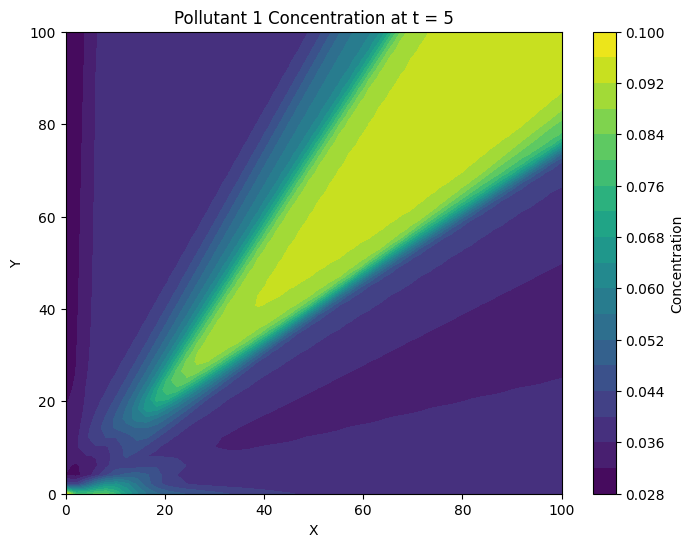

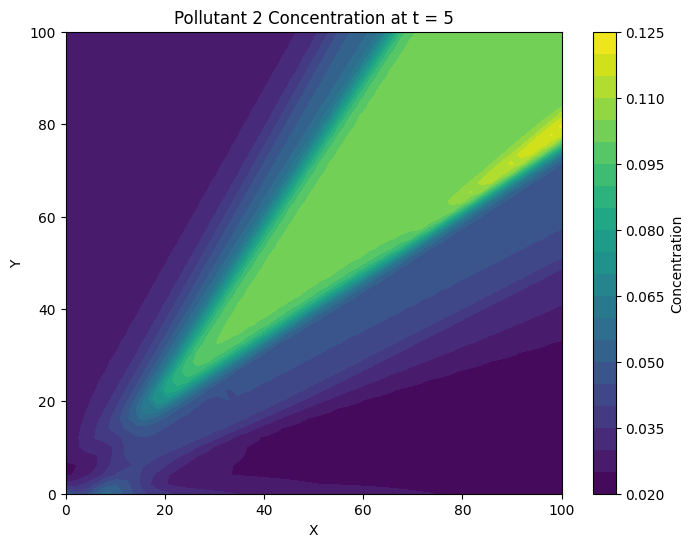

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class AirQualityPINN:
    def __init__(self, domain_size=(100, 100, 10), hidden_layers=[20, 20], num_pollutants=2):
        """
        Initialize the PINN for air quality monitoring with multiple pollutants.

        Args:
            domain_size: (x_max, y_max, t_max) representing the spatial and temporal domain.
            hidden_layers: A list of hidden layer sizes for the neural network.
            num_pollutants: The number of pollutants to model.
        """
        self.x_max, self.y_max, self.t_max = domain_size
        self.num_pollutants = num_pollutants

        # Physics parameters (example values, can be pollutant-specific)
        self.wind_velocity = (1.0, 0.5)  # (u, v) components of wind velocity
        self.diffusion_coefficients = [0.1, 0.05]  # Diffusion coefficients for each pollutant
        self.decay_rates = [0.01, 0.005]  # Decay rates for each pollutant

        # Initialize neural network
        self.model = self.build_model(hidden_layers)

    def build_model(self, hidden_layers):
        """Build the neural network model."""
        inputs = tf.keras.layers.Input(shape=(3,))  # (x, y, t)
        x = inputs

        # Hidden layers
        for units in hidden_layers:
            x = tf.keras.layers.Dense(units, activation='tanh')(x)

        # Output layer (pollutant concentrations)
        # Softplus activation ensures positive concentrations
        outputs = tf.keras.layers.Dense(self.num_pollutants, activation='softplus')(x)

        return tf.keras.Model(inputs=inputs, outputs=outputs)

    def pde_loss(self, x_tf, y_tf, t_tf):
        """Calculate PDE residual loss (advection-diffusion equation) for multiple pollutants."""
        with tf.GradientTape(persistent=True) as tape2:
            tape2.watch(x_tf)
            tape2.watch(y_tf)
            with tf.GradientTape(persistent=True) as tape1:
                tape1.watch(x_tf)
                tape1.watch(y_tf)
                tape1.watch(t_tf)

                inputs = tf.stack([x_tf[:, 0], y_tf[:, 0], t_tf[:, 0]], axis=1)
                c = self.model(inputs)  # Pollutant concentrations (num_pollutants outputs)

            c_x = tape1.gradient(c, x_tf)
            c_y = tape1.gradient(c, y_tf)
            c_t = tape1.gradient(c, t_tf)

        c_xx = tape2.gradient(c_x, x_tf)
        c_yy = tape2.gradient(c_y, y_tf)

        pde_residuals = []
        for i in range(self.num_pollutants):
            # Advection-diffusion equation for each pollutant with decay
            pde_residual = (c_t[:, i:i+1] + self.wind_velocity[0] * c_x[:, i:i+1] +
                            self.wind_velocity[1] * c_y[:, i:i+1] -
                            self.diffusion_coefficients[i] * (c_xx[:, i:i+1] + c_yy[:, i:i+1]) +
                            self.decay_rates[i] * c[:, i:i+1])
            pde_residuals.append(pde_residual)

        # Total PDE loss
        total_pde_loss = tf.reduce_mean(tf.square(tf.concat(pde_residuals, axis=1)))
        return total_pde_loss

    def boundary_loss(self, x_bc, y_bc, t_bc, c_bc):
        """Calculate boundary condition loss."""
        inputs_bc = tf.stack([x_bc[:, 0], y_bc[:, 0], t_bc[:, 0]], axis=1)
        c_pred_bc = self.model(inputs_bc)
        return tf.reduce_mean(tf.square(c_pred_bc - c_bc))

    def initial_loss(self, x_ic, y_ic, t_ic, c_ic):
        """Calculate initial condition loss."""
        inputs_ic = tf.stack([x_ic[:, 0], y_ic[:, 0], t_ic[:, 0]], axis=1)
        c_pred_ic = self.model(inputs_ic)
        return tf.reduce_mean(tf.square(c_pred_ic - c_ic))

    def train(self, epochs=1000, n_collocation=1000, n_boundary=100, n_initial=100):
        """Train the PINN model."""
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        for epoch in range(epochs):
            # Generate collocation points
            x = np.random.uniform(0, self.x_max, (n_collocation, 1))
            y = np.random.uniform(0, self.y_max, (n_collocation, 1))
            t = np.random.uniform(0, self.t_max, (n_collocation, 1))

            # Generate boundary conditions (example: fixed concentration at edges)
            x_bc = np.random.choice([0, self.x_max], size=(n_boundary, 1))
            y_bc = np.random.uniform(0, self.y_max, (n_boundary, 1))
            t_bc = np.random.uniform(0, self.t_max, (n_boundary, 1))
            c_bc = np.zeros((n_boundary, self.num_pollutants))  # Concentration = 0 at boundaries

            # Generate initial conditions (example: Gaussian plume)
            x_ic = np.random.uniform(0, self.x_max, (n_initial, 1))
            y_ic = np.random.uniform(0, self.y_max, (n_initial, 1))
            t_ic = np.zeros((n_initial, 1))
            c_ic = np.exp(-((x_ic - self.x_max / 2)**2 + (y_ic - self.y_max / 2)**2) / (2 * 10**2))
            c_ic = np.repeat(c_ic, self.num_pollutants, axis=1)  # Repeat for each pollutant


            with tf.GradientTape() as tape:
                # Calculate losses
                pde_loss = self.pde_loss(tf.constant(x, dtype=tf.float32),
                                       tf.constant(y, dtype=tf.float32),
                                       tf.constant(t, dtype=tf.float32))
                bc_loss = self.boundary_loss(tf.constant(x_bc, dtype=tf.float32),
                                          tf.constant(y_bc, dtype=tf.float32),
                                          tf.constant(t_bc, dtype=tf.float32),
                                          tf.constant(c_bc, dtype=tf.float32))
                ic_loss = self.initial_loss(tf.constant(x_ic, dtype=tf.float32),
                                         tf.constant(y_ic, dtype=tf.float32),
                                         tf.constant(t_ic, dtype=tf.float32),
                                         tf.constant(c_ic, dtype=tf.float32))

                total_loss = pde_loss + bc_loss + ic_loss

            # Optimize
            grads = tape.gradient(total_loss, self.model.trainable_variables)
            optimizer.apply_gradients(zip(grads, self.model.trainable_variables))

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {total_loss.numpy():.6f}")

    def predict(self, x, y, t):
        """Predict pollutant concentration at given points."""
        inputs = tf.stack([x.flatten(), y.flatten(), t.flatten()], axis=1)
        return self.model(inputs).numpy().reshape(x.shape + (self.num_pollutants,))

    def plot_concentration(self, t=5, pollutant_index=0):
        """Plot the predicted concentration distribution at a specific time."""
        x = np.linspace(0, self.x_max, 50)
        y = np.linspace(0, self.y_max, 50)
        X, Y = np.meshgrid(x, y)
        T = np.full_like(X, t)

        C = self.predict(X, Y, T)[:, :, pollutant_index]  # Get concentration for the specific pollutant

        plt.figure(figsize=(8, 6))
        plt.contourf(X, Y, C, levels=20)
        plt.colorbar(label='Concentration')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Pollutant {pollutant_index + 1} Concentration at t = {t}')
        plt.show()

# Example usage:
pinn = AirQualityPINN()
pinn.train(epochs=1000)
pinn.plot_concentration(pollutant_index=0)  # Visualize concentration of the first pollutant
pinn.plot_concentration(pollutant_index=1)  # Visualize concentration of the second pollutant

In [ ]:
import tensorflow as tf
import numpy as np

# Assuming you have terrain data as a 2D NumPy array (elevation)
# and building data as a binary mask (1 for building, 0 for open space)

class AirQualityPINN:
    # ... (Other parts of the class remain the same)

    def pde_loss(self, x_tf, y_tf, t_tf, elevation_tf, building_mask_tf):
        # ... (Other calculations)

        # Terrain influence on wind velocity (simplified example)
        wind_x = self.wind_velocity[0] * (1 + 0.1 * elevation_tf)
        wind_y = self.wind_velocity[1] * (1 - 0.05 * elevation_tf)

        # Building effect (reduced diffusion near buildings)
        diffusion_coefficient = self.diffusion_coefficient * (1 - 0.8 * building_mask_tf)

        # Advection-diffusion equation with terrain and building effects
        pde_residual = (c_t + wind_x * c_x + wind_y * c_y -
                        diffusion_coefficient * (c_xx + c_yy) + self.decay_rate * c)
        return tf.reduce_mean(tf.square(pde_residual))

    # ... (Rest of the class)

# During training:
# - Load terrain and building data
# - Convert them to TensorFlow tensors
# - Pass them as arguments to the pde_loss function

In [ ]:
# Assuming you have meteorological data as a NumPy array (temperature, humidity, etc.)

class AirQualityPINN:
    # ... (Other parts of the class)

    def build_model(self, hidden_layers):
        # ... (Input layer)

        # Concatenate meteorological data with spatial and temporal inputs
        met_data_input = tf.keras.layers.Input(shape=(num_met_features,))
        merged_input = tf.keras.layers.concatenate([inputs, met_data_input])

        # ... (Hidden layers and output layer)

        return tf.keras.Model(inputs=[inputs, met_data_input], outputs=outputs)

    # ... (Rest of the class)

# During training:
# - Load meteorological data
# - Convert it to a TensorFlow tensor
# - Pass it as an additional input to the model during training and prediction

In [ ]:
import tensorflow as tf
import numpy as np

# Define the domain and parameters
domain_size = (100, 100, 10)  # (x_max, y_max, t_max)
num_pollutants = 3  # CO, CO2, and other gas
wind_velocity = (1.0, 0.5)
diffusion_coefficients = [0.1, 0.05, 0.02]
decay_rates = [0.01, 0.005, 0.002]

# Define the PINN model
class AirQualityPINN(tf.keras.Model):
    def __init__(self, hidden_layers=[20, 20]):
        super().__init__()
        self.layers = []
        for units in hidden_layers:
            self.layers.append(tf.keras.layers.Dense(units, activation='tanh'))
        self.output_layer = tf.keras.layers.Dense(num_pollutants, activation='softplus')

    def call(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return self.output_layer(x)

# Create the PINN instance
pinn = AirQualityPINN()

# Define the loss function
def loss_function(x_tf, y_tf, t_tf, sensor_data):
    # ... (Implementation of PDE loss and data loss, similar to previous examples)
    # Assume sensor_data is a dictionary with keys 'CO', 'CO2', 'other_gas'
    # containing sensor measurements at corresponding locations and times.
    # You'll need to interpolate or match sensor data with collocation points.

# Generate sample sensor data (replace with your actual data)
# Assume sensor locations are at (x=25, y=50), (x=75, y=25) at t=5
sensor_data = {
    'CO': np.array([[25, 50, 5, 10], [75, 25, 5, 12]]),  # x, y, t, concentration
    'CO2': np.array([[25, 50, 5, 50], [75, 25, 5, 60]]),
    'other_gas': np.array([[25, 50, 5, 2], [75, 25, 5, 3]]),
}

# Generate collocation points (replace with your desired distribution)
n_collocation = 1000
x = np.random.uniform(0, domain_size[0], (n_collocation, 1))
y = np.random.uniform(0, domain_size[1], (n_collocation, 1))
t = np.random.uniform(0, domain_size[2], (n_collocation, 1))

# Training loop
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function(tf.constant(x, dtype=tf.float32),
                            tf.constant(y, dtype=tf.float32),
                            tf.constant(t, dtype=tf.float32),
                            sensor_data)
    grads = tape.gradient(loss, pinn.trainable_variables)
    optimizer.apply_gradients(zip(grads, pinn.trainable_variables))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy():.6f}")

# Prediction and visualization
# Prediction and visualization
nx = 50  # Number of points in x direction
ny = 50  # Number of points in y direction
x_pred = np.linspace(0, domain_size[0], nx)
y_pred = np.linspace(0, domain_size[1], ny)
X, Y = np.meshgrid(x_pred, y_pred)
t_pred = 5  # Time point for prediction

# Predict concentrations for each pollutant
predicted_concentrations = pinn(tf.constant(np.stack([X.flatten(), Y.flatten(), np.full_like(X.flatten(), t_pred)], axis=1), dtype=tf.float32))
C_CO = predicted_concentrations[:, 0].numpy().reshape(X.shape)
C_CO2 = predicted_concentrations[:, 1].numpy().reshape(X.shape)
C_other_gas = predicted_concentrations[:, 2].numpy().reshape(X.shape)

# Visualize CO concentration
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, C_CO, levels=20)
plt.colorbar(label='CO Concentration')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'CO Concentration at t = {t_pred}')
plt.show()

# Visualize CO2 concentration
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, C_CO2, levels=20)
plt.colorbar(label='CO2 Concentration')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'CO2 Concentration at t = {t_pred}')
plt.show()

# Visualize other gas concentration
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, C_other_gas, levels=20)
plt.colorbar(label='Other Gas Concentration')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Other Gas Concentration at t = {t_pred}')
plt.show()

IndentationError: expected an indented block after function definition on line 30 (<ipython-input-1-0c4abed5ad9a>, line 38)

Epoch 0: Loss = 2048.234131
Epoch 100: Loss = 1656.726562
Epoch 200: Loss = 1442.701904
Epoch 300: Loss = 1289.109253
Epoch 400: Loss = 1160.145508
Epoch 500: Loss = 1046.784546
Epoch 600: Loss = 944.923462
Epoch 700: Loss = 852.279541
Epoch 800: Loss = 767.451416
Epoch 900: Loss = 689.544006


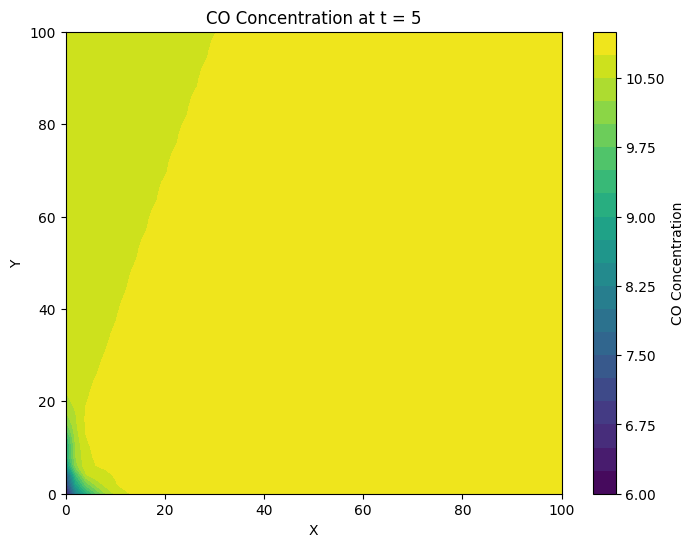

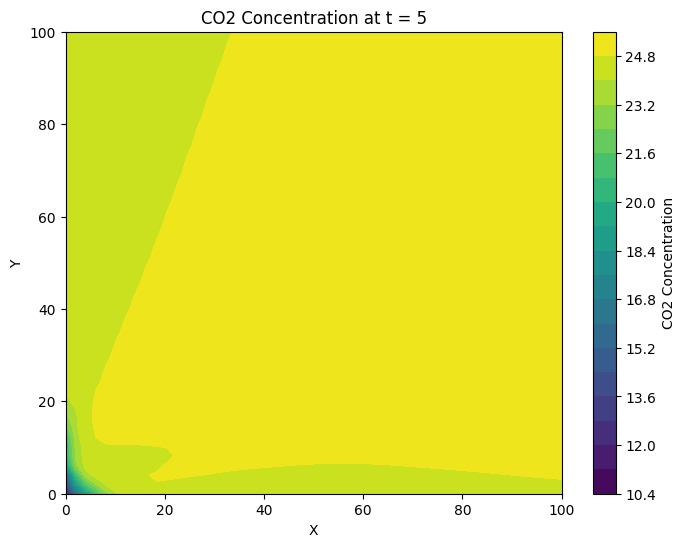

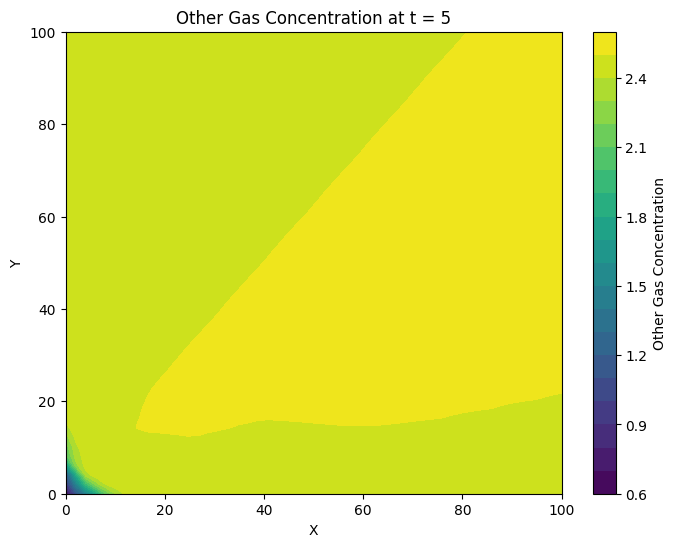

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the domain and parameters
domain_size = (100, 100, 10)  # (x_max, y_max, t_max)
num_pollutants = 3  # CO, CO2, and other gas
wind_velocity = (1.0, 0.5)
diffusion_coefficients = [0.1, 0.05, 0.02]
decay_rates = [0.01, 0.005, 0.002]

# Define the PINN model
class AirQualityPINN(tf.keras.Model):
    def __init__(self, hidden_layers=[20, 20]):
        super().__init__()
        # Rename 'layers' to 'dense_layers' or something else
        self.dense_layers = []  # Changed from self.layers to self.dense_layers
        for units in hidden_layers:
            self.dense_layers.append(tf.keras.layers.Dense(units, activation='tanh'))
        self.output_layer = tf.keras.layers.Dense(num_pollutants, activation='softplus')

    def call(self, inputs):
        x = inputs
        # Iterate through self.dense_layers instead of self.layers
        for layer in self.dense_layers:  # Changed from self.layers to self.dense_layers
            x = layer(x)
        return self.output_layer(x)

# Create the PINN instance
pinn = AirQualityPINN()

# Define the loss function
def loss_function(x_tf, y_tf, t_tf, sensor_data):
    # PDE Loss (Advection-Diffusion Equation)
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch(x_tf)
        tape2.watch(y_tf)
        with tf.GradientTape(persistent=True) as tape1:
            tape1.watch(x_tf)
            tape1.watch(y_tf)
            tape1.watch(t_tf)

            inputs = tf.stack([x_tf[:, 0], y_tf[:, 0], t_tf[:, 0]], axis=1)
            c = pinn(inputs)  # Pollutant concentrations (num_pollutants outputs)

        c_x = tape1.gradient(c, x_tf)
        c_y = tape1.gradient(c, y_tf)
        c_t = tape1.gradient(c, t_tf)

    c_xx = tape2.gradient(c_x, x_tf)
    c_yy = tape2.gradient(c_y, y_tf)

    pde_residuals = []
    for i in range(num_pollutants):
        # Advection-diffusion equation for each pollutant with decay
        pde_residual = (c_t[:, i:i+1] + wind_velocity[0] * c_x[:, i:i+1] +
                        wind_velocity[1] * c_y[:, i:i+1] -
                        diffusion_coefficients[i] * (c_xx[:, i:i+1] + c_yy[:, i:i+1]) +
                        decay_rates[i] * c[:, i:i+1])
        pde_residuals.append(pde_residual)

    # Total PDE loss
    pde_loss = tf.reduce_mean(tf.square(tf.concat(pde_residuals, axis=1)))

    # Data Loss (Sensor Measurements)
    data_loss = 0
    for pollutant_name, sensor_data_points in sensor_data.items():
        for data_point in sensor_data_points:
            x_sensor, y_sensor, t_sensor, concentration = data_point
            predicted_concentration = pinn(tf.constant([[x_sensor, y_sensor, t_sensor]], dtype=tf.float32))

            # Get the index of the pollutant
            pollutant_index = list(sensor_data.keys()).index(pollutant_name)

            data_loss += tf.square(predicted_concentration[0, pollutant_index] - concentration)

    data_loss = data_loss / len(sensor_data) # Average over the number of pollutants

    # Total Loss
    total_loss = pde_loss + data_loss

    return total_loss

# Generate sample sensor data (replace with your actual data)
# Assume sensor locations are at (x=25, y=50), (x=75, y=25) at t=5
sensor_data = {
    'CO': np.array([[25, 50, 5, 10], [75, 25, 5, 12]]),  # x, y, t, concentration
    'CO2': np.array([[25, 50, 5, 50], [75, 25, 5, 60]]),
    'other_gas': np.array([[25, 50, 5, 2], [75, 25, 5, 3]]),
}

# Generate collocation points (replace with your desired distribution)
n_collocation = 1000
x = np.random.uniform(0, domain_size[0], (n_collocation, 1))
y = np.random.uniform(0, domain_size[1], (n_collocation, 1))
t = np.random.uniform(0, domain_size[2], (n_collocation, 1))

# Training loop
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function(tf.constant(x, dtype=tf.float32),
                            tf.constant(y, dtype=tf.float32),
                            tf.constant(t, dtype=tf.float32),
                            sensor_data)
    grads = tape.gradient(loss, pinn.trainable_variables)
    optimizer.apply_gradients(zip(grads, pinn.trainable_variables))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy():.6f}")

# Prediction and visualization
nx = 50  # Number of points in x direction
ny = 50  # Number of points in y direction
x_pred = np.linspace(0, domain_size[0], nx)
y_pred = np.linspace(0, domain_size[1], ny)
X, Y = np.meshgrid(x_pred, y_pred)
t_pred = 5  # Time point for prediction

# Predict concentrations for each pollutant
predicted_concentrations = pinn(tf.constant(np.stack([X.flatten(), Y.flatten(), np.full_like(X.flatten(), t_pred)], axis=1), dtype=tf.float32))
C_CO = predicted_concentrations[:, 0].numpy().reshape(X.shape)
C_CO2 = predicted_concentrations[:, 1].numpy().reshape(X.shape)
C_other_gas = predicted_concentrations[:, 2].numpy().reshape(X.shape)

# Visualize CO concentration
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, C_CO, levels=20)
plt.colorbar(label='CO Concentration')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'CO Concentration at t = {t_pred}')
plt.show()

# Visualize CO2 concentration
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, C_CO2, levels=20)
plt.colorbar(label='CO2 Concentration')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'CO2 Concentration at t = {t_pred}')
plt.show()

# Visualize other gas concentration
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, C_other_gas, levels=20)
plt.colorbar(label='Other Gas Concentration')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Other Gas Concentration at t = {t_pred}')
plt.show()

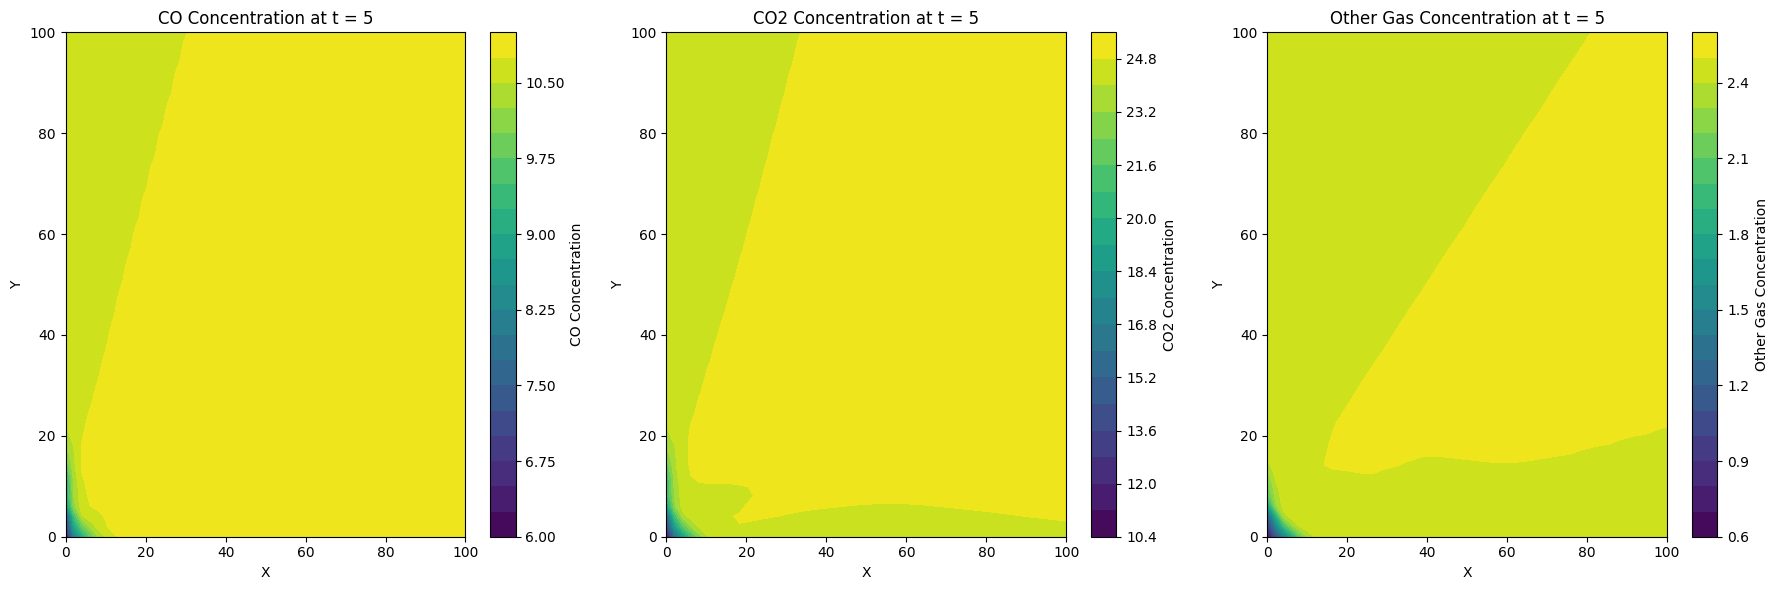

In [ ]:
# Predict concentrations for each pollutant
predicted_concentrations = pinn(tf.constant(np.stack([X.flatten(), Y.flatten(), np.full_like(X.flatten(), t_pred)], axis=1), dtype=tf.float32))
C_CO = predicted_concentrations[:, 0].numpy().reshape(X.shape)
C_CO2 = predicted_concentrations[:, 1].numpy().reshape(X.shape)
C_other_gas = predicted_concentrations[:, 2].numpy().reshape(X.shape)

# --- Plotting ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# CO Concentration
im1 = axes[0].contourf(X, Y, C_CO, levels=20)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title(f'CO Concentration at t = {t_pred}')
fig.colorbar(im1, ax=axes[0], label='CO Concentration')

# CO2 Concentration
im2 = axes[1].contourf(X, Y, C_CO2, levels=20)
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title(f'CO2 Concentration at t = {t_pred}')
fig.colorbar(im2, ax=axes[1], label='CO2 Concentration')

# Other Gas Concentration
im3 = axes[2].contourf(X, Y, C_other_gas, levels=20)
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')
axes[2].set_title(f'Other Gas Concentration at t = {t_pred}')
fig.colorbar(im3, ax=axes[2], label='Other Gas Concentration')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

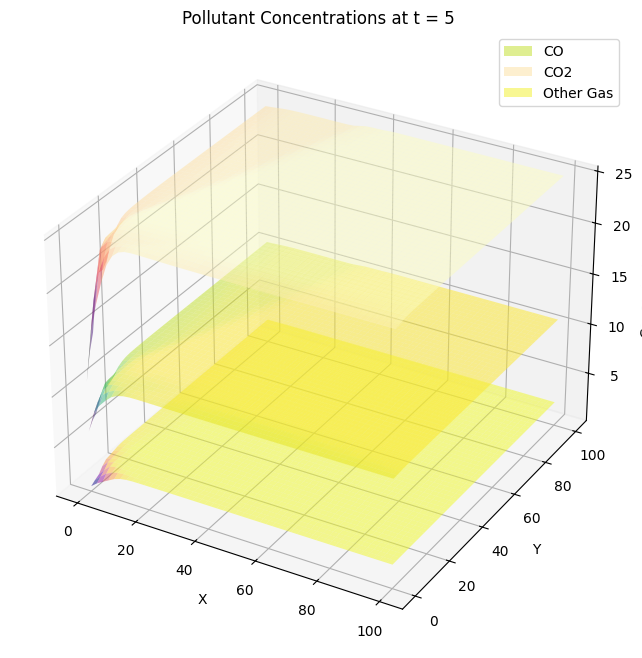

In [ ]:
# Predict concentrations for each pollutant
predicted_concentrations = pinn(tf.constant(np.stack([X.flatten(), Y.flatten(), np.full_like(X.flatten(), t_pred)], axis=1), dtype=tf.float32))
C_CO = predicted_concentrations[:, 0].numpy().reshape(X.shape)
C_CO2 = predicted_concentrations[:, 1].numpy().reshape(X.shape)
C_other_gas = predicted_concentrations[:, 2].numpy().reshape(X.shape)

# --- Plotting ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surfaces for each gas
ax.plot_surface(X, Y, C_CO, label='CO', alpha=0.5, cmap='viridis')
ax.plot_surface(X, Y, C_CO2, label='CO2', alpha=0.5, cmap='magma')
ax.plot_surface(X, Y, C_other_gas, label='Other Gas', alpha=0.5, cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Concentration')
ax.set_title(f'Pollutant Concentrations at t = {t_pred}')
ax.legend()

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Data Acquisition and Preprocessing (Assumed Values) ---

# Assume a simple dataset with 1000 data points
num_data_points = 1000

# Generate random input features (x, y, t) within a domain
x = np.random.uniform(0, 100, num_data_points)  # x-coordinates
y = np.random.uniform(0, 100, num_data_points)  # y-coordinates
t = np.random.uniform(0, 10, num_data_points)   # time points

# Generate random target values (pollutant concentration)
pollutant_concentration = np.random.uniform(0, 1, num_data_points)

# Combine inputs and targets into NumPy arrays
inputs = np.stack([x, y, t], axis=1)
targets = pollutant_concentration.reshape(-1, 1)  # Reshape to (num_data_points, 1)

# --- 2. Physics-Informed Model ---

# Advection-Diffusion Equation
def advection_diffusion_equation(c, x, y, t, wind_velocity, diffusion_coefficient, decay_rate):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch(x)
        tape2.watch(y)
        with tf.GradientTape(persistent=True) as tape1:
            tape1.watch(x)
            tape1.watch(y)
            tape1.watch(t)
            inputs = tf.stack([x[:, 0], y[:, 0], t[:, 0]], axis=1)
            c = model(inputs)
        c_x = tape1.gradient(c, x)
        c_y = tape1.gradient(c, y)
        c_t = tape1.gradient(c, t)
    c_xx = tape2.gradient(c_x, x)
    c_yy = tape2.gradient(c_y, y)
    residual = (c_t + wind_velocity[0] * c_x + wind_velocity[1] * c_y -
                diffusion_coefficient * (c_xx + c_yy) + decay_rate * c)
    return residual

# PINN Architecture
class AirQualityPINN(tf.keras.Model):
    def __init__(self, hidden_layers=[20, 20]):
        super(AirQualityPINN, self).__init__()
        self.hidden_layers = hidden_layers
        self.dense_layers = [tf.keras.layers.Dense(units, activation='tanh') for units in hidden_layers]
        self.output_layer = tf.keras.layers.Dense(1, activation='softplus')

    def call(self, inputs):
        x = inputs
        for layer in self.dense_layers:
            x = layer(x)
        output = self.output_layer(x)
        return output

# --- 3. Boundary and Initial Conditions (Assumed Values) ---

# Assume simple boundary and initial conditions (can be customized)
# ...

# --- 4. Training the PINN ---

# Loss Function
def loss_function(model, inputs, targets, wind_velocity, diffusion_coefficient, decay_rate):
    # Convert inputs to TensorFlow Tensors
    inputs_tf = tf.convert_to_tensor(inputs, dtype=tf.float32)

    predictions = model(inputs_tf)
    data_loss = tf.reduce_mean(tf.square(predictions - targets))

    x, y, t = inputs_tf[:, 0:1], inputs_tf[:, 1:2], inputs_tf[:, 2:3] # Extract x, y, t from the Tensor

    physics_loss = tf.reduce_mean(tf.square(
        advection_diffusion_equation(predictions, x, y, t, wind_velocity, diffusion_coefficient, decay_rate)
    ))
    total_loss = data_loss + physics_loss
    return total_loss

# Training Loop
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model = AirQualityPINN()
num_epochs = 1000

for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        total_loss = loss_function(model, inputs, targets, (1.0, 0.5), 0.1, 0.01)  # Assumed values for wind, diffusion, decay
    grads = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss.numpy():.4f}")

# --- 5. Prediction and Monitoring ---

# Example prediction at a specific location and time
prediction = model(tf.constant([[50.0, 50.0, 5.0]]))  # Example input: x=50, y=50, t=5
print(f"Predicted Pollutant Concentration: {prediction.numpy()[0][0]:.4f}")

# ... (Further visualization and integration into monitoring system)

Epoch [100/1000], Loss: 0.0804
Epoch [200/1000], Loss: 0.0795
Epoch [300/1000], Loss: 0.0792
Epoch [400/1000], Loss: 0.0790
Epoch [500/1000], Loss: 0.0788
Epoch [600/1000], Loss: 0.0785
Epoch [700/1000], Loss: 0.0781
Epoch [800/1000], Loss: 0.0778
Epoch [900/1000], Loss: 0.0775
Epoch [1000/1000], Loss: 0.0772
Predicted Pollutant Concentration: 0.5212


PINNs can be applied to dimensionality reduction and clustering for air quality data analysis.

Dimensionality Reduction (PCA)

While traditional PCA uses linear transformations, PINNs can be adapted to perform nonlinear dimensionality reduction. Here's a potential approach:

1. Data Preprocessing: Prepare your sensor data by cleaning, normalizing, and potentially handling missing values.

2. PINN Architecture: Design a PINN with an encoder-decoder structure.

The encoder maps the high-dimensional sensor data to a lower-dimensional representation (latent space).

The decoder reconstructs the original data from the latent space representation.
Physics-Informed Loss:

Include a reconstruction loss to ensure the decoder accurately recovers the original data.
Incorporate physics-informed constraints based on your knowledge of air quality dynamics (e.g., advection-diffusion equations, chemical reactions). This guides the PINN to learn a physically meaningful lower-dimensional representation.

Training: Train the PINN to minimize the combined loss function. The learned latent space will capture the most important factors influencing air quality, similar to PCA.

Clustering

PINNs can be integrated with clustering algorithms to identify pollution hotspots and spatial patterns. Here's a potential approach:

Dimensionality Reduction: Use a PINN (as described above) or traditional PCA to reduce the dimensionality of your sensor data.

Clustering Algorithm: Apply a clustering algorithm (e.g., K-means, DBSCAN) to the lower-dimensional data. This groups similar air quality readings together.

Physics-Informed Refinement: Use the PINN's physics-informed constraints to refine the cluster assignments. For example, you could incorporate spatial and temporal dependencies into the clustering process, ensuring that clusters reflect the underlying physical processes.

Applying PINNs to SVD Spectral

PINNs can potentially be used to enhance SVD spectral analysis for air quality data:

SVD Decomposition: Perform SVD on your sensor data to obtain the singular values and vectors.

PINN Integration: Use a PINN to learn a mapping between the singular values/vectors and relevant air quality parameters. This could involve incorporating physics-informed constraints based on the relationships between spectral features and air quality dynamics.

Interpretation and Analysis: The PINN can help interpret the spectral features and identify the dominant modes of variation in air quality, providing insights into the underlying physical processes.

synthetic air quality data. For simplicity, let's assume we have two air pollutants (e.g., PM2.5 and NO2) measured at different locations over time. We'll create a dataset with spatial coordinates (x, y), time (t), and pollutant concentrations (c1, c2).

In [ ]:
import numpy as np

# Generate synthetic data
num_samples = 1000
x = np.random.uniform(0, 100, num_samples)  # Spatial coordinates
y = np.random.uniform(0, 100, num_samples)
t = np.random.uniform(0, 10, num_samples)  # Time

# Pollutant concentrations (simulated with simple functions)
c1 = np.sin(x / 10) + np.cos(y / 10) + 0.1 * t + np.random.normal(0, 0.2, num_samples)
c2 = np.exp(-(x - 50)**2 / 500) + np.exp(-(y - 50)**2 / 500) + 0.05 * t + np.random.normal(0, 0.1, num_samples)

# Combine data into a single array
data = np.stack([x, y, t, c1, c2], axis=1)

In [ ]:
import tensorflow as tf

class PINN_EncoderDecoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(PINN_EncoderDecoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(latent_dim, activation='linear')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(2, activation='linear')  # Output: c1, c2
        ])

    def call(self, inputs):
        latent_rep = self.encoder(inputs[:, :3])  # Input: x, y, t
        reconstructed = self.decoder(latent_rep)
        return latent_rep, reconstructed

    def pde_loss(self, inputs, reconstructed):
        # Placeholder for physics-informed loss (e.g., advection-diffusion equation)
        # Adapt based on your specific air quality dynamics
        return tf.reduce_mean(tf.square(reconstructed - inputs[:, 3:]))  # Simple reconstruction loss

# Create and train the PINN
latent_dim = 2
pinn = PINN_EncoderDecoder(latent_dim)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

for epoch in range(1000):
    with tf.GradientTape() as tape:
        latent_rep, reconstructed = pinn(data)
        loss = pinn.pde_loss(data, reconstructed)

    grads = tape.gradient(loss, pinn.trainable_variables)
    optimizer.apply_gradients(zip(grads, pinn.trainable_variables))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy():.6f}")

# Get the lower-dimensional representation
latent_rep, _ = pinn(data)

Epoch 0: Loss = 6.947577
Epoch 100: Loss = 0.751946
Epoch 200: Loss = 0.661918
Epoch 300: Loss = 0.586316
Epoch 400: Loss = 0.523818
Epoch 500: Loss = 0.498299
Epoch 600: Loss = 0.478922
Epoch 700: Loss = 0.462370
Epoch 800: Loss = 0.447870
Epoch 900: Loss = 0.435267


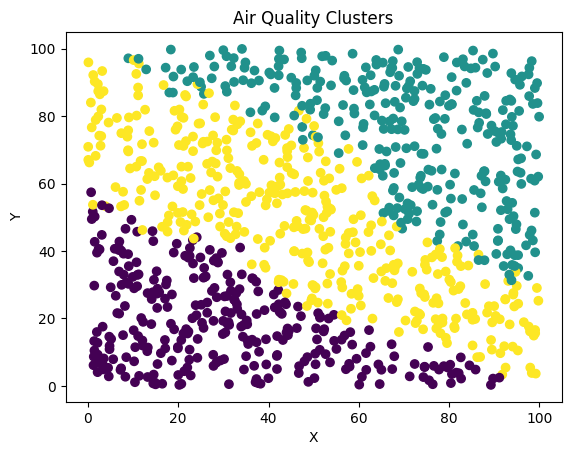

In [ ]:
from sklearn.cluster import KMeans

# Perform clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(latent_rep.numpy())

# Visualize clusters (example)
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Air Quality Clusters')
plt.show()